In [1]:
from sklearn import cluster, datasets
from sklearn.cluster import KMeans
from  matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import scipy as sp
import sklearn.linear_model as linm
import sklearn.metrics as met

In [2]:
def generate_data(n):
    
    #prva klasa
    n1 = int(n/2)
    x1_1 = np.random.normal(0.0, 2, (n1,1));
    #x1_1 = .21*(6.*np.random.standard_normal((n1,1))); 
    x2_1 = np.power(x1_1,2) + np.random.standard_normal((n1,1));
    y_1 = np.zeros([n1,1])
    temp1 = np.concatenate((x1_1,x2_1,y_1),axis = 1)
    
    #druga klasa
    n2 = int(n - n/2)
    x_2 = np.random.multivariate_normal((0,10), [[0.8,0],[0,1.2]], n2);
    y_2 = np.ones([n2,1])
    temp2 = np.concatenate((x_2,y_2),axis = 1)
    
    data  = np.concatenate((temp1,temp2),axis = 0)
    
    #permutiraj podatke
    indices = np.random.permutation(n)    
    data = data[indices,:]
    
    return data

In [3]:
np.random.seed(242)
train = generate_data(200)

x1train = train[:, 0]
x2train = train[:, 1]
ytrain = train[:, 2]

np.random.seed(12)
learn = generate_data(100)

x1learn = learn[:, 0]
x2learn = learn[:, 1]
ylearn = learn[:, 2]

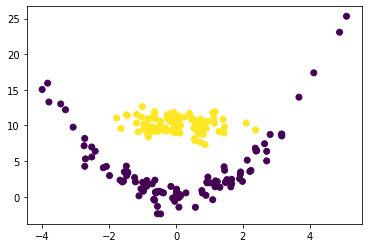

In [4]:
plt.scatter(x1train, x2train, c=ytrain)
plt.show()

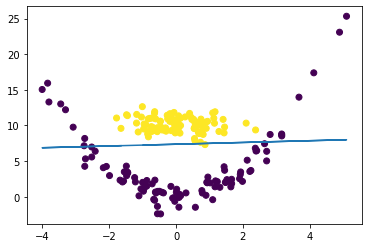

In [5]:
xtrain = train[:, 0:2]
ylearn = learn[:, 2]

logreg = linm.LogisticRegression()
logreg.fit(xtrain, ytrain)
logreg.predict(xtrain)
param1 = logreg.intercept_
param2 = logreg.coef_

plt.figure(1)
plt.scatter(x1train, x2train, c=ytrain)
x2 = (-logreg.intercept_ - logreg.coef_[0][0]*x1train) / logreg.coef_[0][1]
plt.plot(x1train, x2)
plt.show()


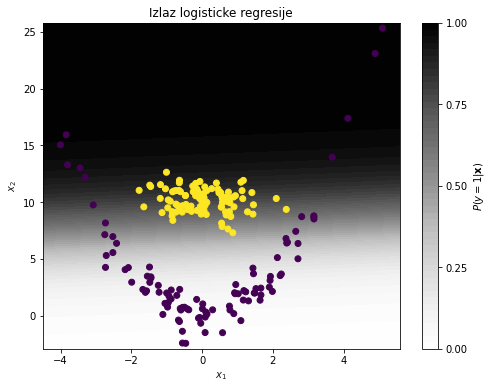

In [6]:
f, ax = plt.subplots(figsize=(8, 6))
x_grid, y_grid = np.mgrid[min(train[:,0])-0.5:max(train[:,0])+0.5:.05,min(train[:,1])-0.5:max(train[:,1])+0.5:.05]
grid = np.c_[x_grid.ravel(), y_grid.ravel()]
probs = logreg.predict_proba(grid)[:, 1].reshape(x_grid.shape)
cont = ax.contourf(x_grid, y_grid, probs, 60, cmap="Greys", vmin=0, vmax=1)
ax_c = f.colorbar(cont)
ax_c.set_label("$P(y = 1|\mathbf{x})$")
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.set_xlabel('$x_1$', alpha=0.9)
ax.set_ylabel('$x_2$', alpha=0.9)
ax.set_title('Izlaz logisticke regresije')
ax.scatter(x1train, x2train, c=ytrain)
plt.show()


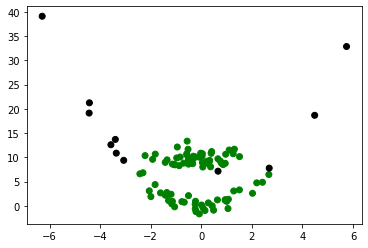

In [7]:
xlearn = learn[:, 0:2]
ypred = logreg.predict(xlearn)
ycolor = []

for i in range(100):
    if int(ylearn[i]) == int(ypred[i]):
        ycolor.append('green')
    else:
        ycolor.append('black')

plt.scatter(x1learn, x2learn, c=ycolor)
plt.show()


In [8]:
def plot_confusion_matrix(c_matrix):
    
    norm_conf = []
    for i in c_matrix:
        a = 0
        tmp_arr = []
        a = sum(i, 0)
        for j in i:
            tmp_arr.append(float(j)/float(a))
        norm_conf.append(tmp_arr)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    res = ax.imshow(np.array(norm_conf), cmap=plt.cm.Greys, interpolation='nearest')

    width = len(c_matrix)
    height = len(c_matrix[0])

    for x in range(width):
        for y in range(height):
            ax.annotate(str(c_matrix[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center', color = 'green', size = 20)

    fig.colorbar(res)
    numbers = '0123456789'
    plt.xticks(range(width), numbers[:width])
    plt.yticks(range(height), numbers[:height])
    
    plt.ylabel('Stvarna klasa')
    plt.title('Predvideno modelom')
    plt.show()

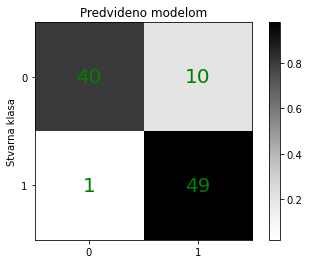

Accuracy = 0.89
Misc rate = 0.10999999999999999
Precision = 0.8
Recall = 0.975609756097561
Specificity = 0.8305084745762712


In [9]:
conf_mat = met.confusion_matrix(ylearn, ypred)
plot_confusion_matrix(conf_mat)

accuracy = met.accuracy_score(ylearn, ypred)
tp = conf_mat[0][0]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[1][1]

print("Accuracy = " + str(accuracy))
misclass_rate = 1 - accuracy
print("Misc rate = " + str(misclass_rate))
precision = tp/(tp+fp)
print("Precision = " + str(precision))
recall = tp/(tp+fn)
print("Recall = " + str(recall))
specificity = tn / (tn+fp)
print("Specificity = " + str(specificity))

In [10]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias = False)
data_train_new = poly.fit_transform(train[:,0:2])